In [31]:
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [32]:
train_dir = "data/train/"
valid_dir="data/validation/"

In [33]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   brightness_range=[0.5, 1.5],

                                  )
validation_datagen = ImageDataGenerator(rescale = 1./255
                                         )

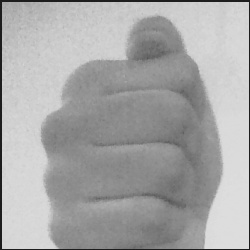

In [34]:
from PIL import Image 

im = Image.open(r"data/train/rock/1.jpg")  
  
im

In [35]:
im.size

(250, 250)

In [36]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (100,100),
                                                    class_mode = "categorical",
                                                    color_mode = "grayscale",
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory=valid_dir,
                                                              target_size = (100,100),
                                                              class_mode = "categorical",
                                                              color_mode = "grayscale",
                                                             )

Found 612 images belonging to 3 classes.
Found 165 images belonging to 3 classes.


In [37]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(100, 100,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(512,activation = 'relu'))

model.add(Dense(3, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [38]:

history = model.fit_generator(train_generator,epochs=30,validation_data = validation_generator)

Epoch 1/30
20/20 [==============================] - 45s 2s/step - loss: 3.4230 - accuracy: 0.4213 - val_loss: 1.1085 - val_accuracy: 0.3152
Epoch 2/30
20/20 [==============================] - 41s 2s/step - loss: 1.1616 - accuracy: 0.6184 - val_loss: 1.2047 - val_accuracy: 0.3152
Epoch 3/30
20/20 [==============================] - 41s 2s/step - loss: 0.9048 - accuracy: 0.6240 - val_loss: 1.2679 - val_accuracy: 0.3152
Epoch 4/30
20/20 [==============================] - 41s 2s/step - loss: 0.6943 - accuracy: 0.7029 - val_loss: 1.4580 - val_accuracy: 0.3152
Epoch 5/30
20/20 [==============================] - 41s 2s/step - loss: 0.6438 - accuracy: 0.7214 - val_loss: 1.6706 - val_accuracy: 0.3152
Epoch 6/30
20/20 [==============================] - 41s 2s/step - loss: 0.6530 - accuracy: 0.7044 - val_loss: 1.9028 - val_accuracy: 0.3152
Epoch 7/30
20/20 [==============================] - 41s 2s/step - loss: 0.5934 - accuracy: 0.7266 - val_loss: 1.5642 - val_accuracy: 0.3152
Epoch 8/30
20/20 [==

In [39]:
model.save('rps.h5')

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 100, 100, 32)      320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
batch_normalization_17 (Batc (None, 50, 50, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 25, 25, 128)      

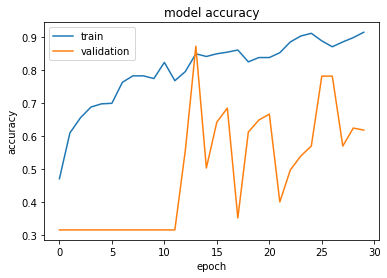

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

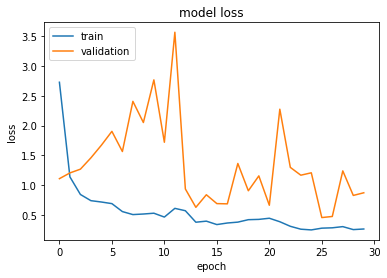

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [57]:
label_dict = {0:'Paper',1:'Rock',2:'Scissor'}

(100, 100)
[[0.12941176 0.11372549 0.10980392 ... 0.11372549 0.11372549 0.10588235]
 [0.12156863 0.70588235 0.72941176 ... 0.75686275 0.76862745 0.76078431]
 [0.10980392 0.69411765 0.71764706 ... 0.76078431 0.75294118 0.75686275]
 ...
 [0.11372549 0.81176471 0.80392157 ... 0.8627451  0.86666667 0.8627451 ]
 [0.11372549 0.81568627 0.81568627 ... 0.85882353 0.85098039 0.86666667]
 [0.12156863 0.82352941 0.82745098 ... 0.8627451  0.86666667 0.86666667]]
[0.7685354, 0.00023279776, 0.2312319]
0
Paper


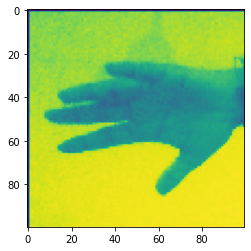

In [67]:
img = image.load_img("data/test/paper/48.jpg",target_size = (100,100),color_mode = "grayscale")
img = np.array(img)/255
plt.imshow(img)
print(img.shape)
print(img)
# img = np.expand_dims(img,axis = 0) 
img = img.reshape(1,100,100,1)
result = model.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(img_index)
print(label_dict[img_index])